<a href="https://colab.research.google.com/github/viethoang1122334/Machine-Learning/blob/master/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 8: Fruit Classification

Download Fruit data

In [0]:
#from google.colab import files
#files.upload()

In [0]:
#!pip install -q kaggle

In [0]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

In [0]:
#!kaggle datasets list -s fruits

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
moltean/fruits                                              Fruits 360                                         734MB  2019-11-04 21:16:32          31270  
sriramr/fruits-fresh-and-rotten-for-classification          Fruits fresh and rotten for classification           4GB  2018-08-24 15:05:40           1246  
mjamilmoughal/fruits-with-colors-dataset                    Fruits with colors dataset                          816B  2018-01-13 10:22:33           2621  
mbkinaci/fruit-images-for-object-detection                  Fruit Images for Object Detection                   28MB  2018-07-01 20:21:59           3842  
prasunroy/natural-images                                    Natural Im

In [0]:
#!kaggle datasets download -d moltean/fruits
#!ls

100% 734M/734M [00:07<00:00, 124MB/s]
100% 734M/734M [00:07<00:00, 103MB/s]
fruits.zip  kaggle.json  sample_data


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!ls "/content"

fruits.zip  gdrive  kaggle.json  sample_data


In [0]:
#!unzip -q "/content/fruits.zip"

In [0]:
#!unzip  "/content/fruits.zip" -d "/content/gdrive/My Drive/Fruit"


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Build CNN

In [4]:
import os
root='/content/gdrive/My Drive/Fruit/fruits-360_dataset/fruits-360/Training'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print(dirlist)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado ripe', 'Avocado', 'Banana Lady Finger', 'Banana Red', 'Banana', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grape White', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon Meyer', 'Lemon', 'Limes', 'Lychee', 'Mandarine', 'Mango Red', 'Mango', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine Flat', 'Nectarine', 'Nut

In [7]:
batch_size = 128
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Fruit/fruits-360_dataset/fruits-360/Training',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,# Specify the classes explicitly
        classes = dirlist, # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 33656 images belonging to 81 classes.


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(81, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
total_sample=train_generator.n

In [25]:
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Fruit/fruits-360_dataset/fruits-360/Training',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = dirlist,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 33656 images belonging to 81 classes.


In [0]:
n_epochs = 2

In [29]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/2
262/262 [==============================] - 1249s 5s/step - loss: 0.2619 - acc: 0.9369
Epoch 2/2
262/262 [==============================] - 1250s 5s/step - loss: 0.1471 - acc: 0.9687


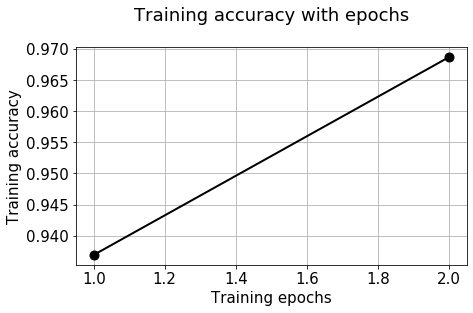

In [32]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

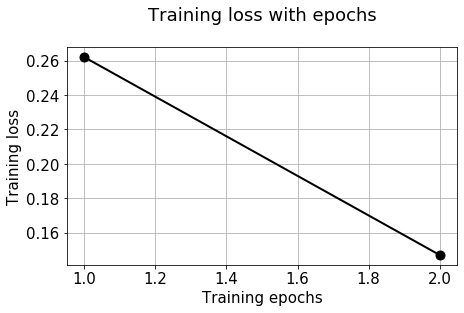

In [33]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [0]:
#To save this model 
#model.save('/content/gdrive/My Drive/Fruit/my_model.h5')

In [0]:
#To load this model
#from keras.models import load_model
#model = load_model('my_model.h5')

In [0]:
from PIL import Image
img_test=Image.open('/content/gdrive/My Drive/Fruit/fruits-360_dataset/fruits-360/Test/Apple Braeburn/r_90_100.jpg')

In [0]:
img_test = img_test.resize((200,200))

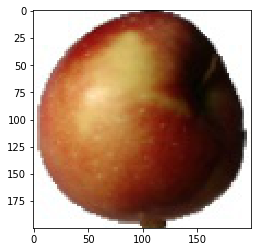

In [47]:
plt.imshow(img_test)
plt.show()

In [0]:
# Expand dimensions for proper prediction
import numpy as np
img_test=np.expand_dims(img_test,axis=0)

In [49]:
model.predict(img_test)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [54]:
y_prob = model.predict(img_test) 
y_classes = y_prob.argmax(axis=-1)
y_classes

array([8])

In [55]:
label_map = (train_generator.class_indices)
label_map

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 15,
 'Avocado ripe': 14,
 'Banana': 18,
 'Banana Lady Finger': 16,
 'Banana Red': 17,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Dates': 35,
 'Eggplant': 36,
 'Ginger Root': 37,
 'Granadilla': 38,
 'Grape Blue': 39,
 'Grape Pink': 40,
 'Grape White': 44,
 'Grape White 2': 41,
 'Grape White 3': 42,
 'Grape White 4': 43,
 'Grapefruit Pink': 45,
 'Grapefruit White': 46,
 'Guava': 47,
 'Hazelnut

In [0]:
import numpy

In [0]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    '/content/gdrive/My Drive/Fruit/fruits-360_dataset/fruits-360/Test', # Put your path here
     target_size=(200, 200),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

Found 20622 images belonging to 120 classes.
